In [78]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Section 1

First order derivative approximation

First order approximation
\begin{align}
D_+u(x) &\equiv \frac{u(x+h)-u(x)}{h} \\
D_-u(x) &\equiv \frac{u(x)-u(x-h)}{h} \\
\end{align}

Second order approximation
\begin{align}
D_0u(x) \equiv \frac{u(x+h) - u(x-h)}{2h}
\end{align}

Third order approximation
\begin{align}
D_3u(x) \equiv \frac{1}{6h} [ 2u(x+h) + 3u(x) - 6u(x-h) + u(x-2h) ]
\end{align}

Second order derivative approximation

Second order approximatino
\begin{align}
D^2u(x) \equiv \frac{u(x+h) - 2u(x) + u(x-h)}{h^2}
\end{align}





In [20]:
# Approximations
# The naming scheme is as follows
# The first letter means which order derivative we are taking, like f-first, s-second and so on
# The second letter stands for derivative
# The Third letter means for which order of approximation we are taking, like f-first, s-second and so on
# The fourth letter stands for order
# The fifth letter means which difference are we taking, f-forwards, b-backwards or c-center

def fdfof(x, h, func):
    return((func(x+h) - func(x))/h)

def fdfob(x, h, func):
    return((func(x) - func(x - h))/h)

def fdsoc(x, h, func):
    return((func(x+h) - func(x-h))/(2*h))

def fdtoc(x, h, func):
    return((2*func(x+h) + 3*func(x) - 6*func(x-h) + func(x-2*h))/(6*h))

# Second order derivatives approximation

def sdsoc(x, h, func):
    return((u(x-h)-2*u(x) + u(x+h))/(h*h))

In [21]:
# Example
mesh_width = np.array([0.1, 0.05, 0.01, 0.005, 0.001])

# We will be taking derivative at x = 1
x = 1

def func(x):
    return(np.sin(x))

def der_func(x):
    return(np.cos(x))

first_order_forward_error = np.abs(fdfof(1, mesh_width, func) - der_func(x)) # Error in first order forward approximation
first_order_backward_error = np.abs(fdfob(1, mesh_width, func) - der_func(x)) # Error in first order backward approximation
second_order_center_error = np.abs(fdsoc(1, mesh_width, func) - der_func(x)) # Error in first order forward approximation
third_order_center_error  = np.abs(fdtoc(1, mesh_width, func) - der_func(x)) # Error in first order forward approximation


In [22]:
print(first_order_forward_error )
print(first_order_backward_error)
print(second_order_center_error )
print(third_order_center_error)

[0.04293855 0.02125749 0.00421632 0.00210592 0.00042083]
[0.04113845 0.02080729 0.00419831 0.00210142 0.00042065]
[9.00053698e-04 2.25097822e-04 9.00499340e-06 2.25125680e-06
 9.00503947e-08]
[6.82069338e-05 8.64914174e-06 6.99413141e-08 8.75402550e-09
 7.01274594e-11]


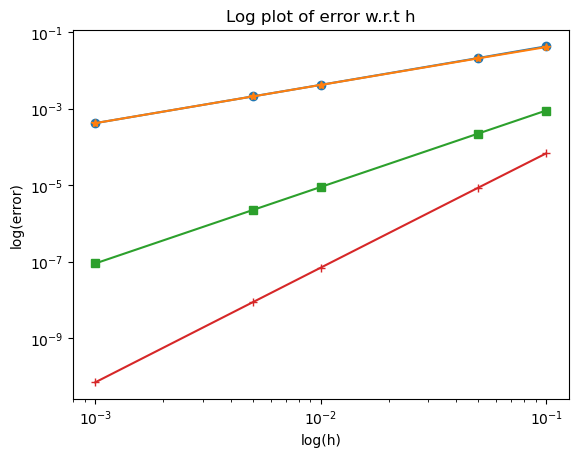

In [33]:
# Log plot of the errors

# Label x-axis and y-axis
# Label each curve
# Legend
# Put symbols at each data point

plt.loglog(mesh_width, first_order_forward_error, 'o-' )
plt.loglog(mesh_width, first_order_backward_error, '*-')
plt.loglog(mesh_width, second_order_center_error, 's-' )
plt.loglog(mesh_width, third_order_center_error, '+-'  )
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.title('Log plot of error w.r.t h')
plt.show()


# Assigment 
# Find the slope of straight lines

## General approach to deriving the coefficients
First approach is using vandermonde matrix, but since vandermonde matrix has high condition number and it is numerically unstable to work with vandermonde matrix, we will also explore another approach

In [90]:
# Below is the vandermonde matrix
# Below 'n' represents the number of points we will use to approximate the kth order derivative

def general_der(x_pts, x_bar, k):
    n = len(x_pts)
    Vand_matrix = np.ones((n, n))
    x_new = x_pts - x_bar
    
    for i in range(1, n):
        Vand_matrix[i] = (x_new)**(i)/math.factorial(i)
        
    
    rhs = np.zeros(n)
    rhs[k] = 1
    
    
    return(np.linalg.solve(Vand_matrix, rhs))

In [182]:
# Second approach
x = [-0.5, -0.3, 0, 0.2, 0.4]
x_bar = 0
x = [i - x_bar for i in x]
# x = np.linspace(0, 1, 10)

m = len(x)
c = [0 for i in range(m)]

for j in range(m):
    c[j] = [0 for i in range(m)]
    for k in range(m):
        c[j][k] = [0 for i in range(j+1)]
        if j != 0:
            for i in range(0, j):
                if k != 0:
                    c[j][k][i] = (x[j] * c[j-1][k][i] - k * c[j-1][k-1][i])/(x[j] - x[i])
                elif k == 0:
                    
                    c[j][k][i] = (1/(x[j] - x[i])) * (x[j] * c[j - 1][k][i])
#                     if i == 0:
#                         print(c[j][k][i])
                    
#             temp_1 = temp_2
            temp_1 = 1
            temp_2 = 1
            for i in range(0, j):
                temp_2 *= x[j] - x[i]
                if i < j - 1:
                    temp_1 *= x[j-1] - x[i]
                
            if k != 0:
                c[j][k][j] = (temp_1/temp_2)*(k*c[j-1][k - 1][j - 1] - x[j-1] * c[j-1][k][j-1])
            else:
                c[j][k][j] = (temp_1/temp_2)*(-x[j-1]*c[j-1][k][j-1])
            
        if j == 0:
            if k!= 0:
                temp_2 = 1
                c[j][k][j] = 0
            else:
                temp_2 = 1
                c[j][k][j] = 1
            
# print(c)

In [185]:
# Example
def u(x):
    return(np.sin(x))

In [184]:
u_arr = u(x)
i = len(x)
k = 2
print(np.dot(c[i - 1][k][:], u_arr[:i]))
print(np.dot(general_der(np.array(x), 0, k), u_arr))

0.0004294045492025944
0.00042940454920437077
